In [287]:
import csv
import pandas as pd
import numpy as np
#import filters  # THIS LIBRARY IS NOT INCLUDED IN THE REPOSITORY
import matplotlib.pyplot as pyp
import scipy.signal as signal
import numpy.fft as fft
import os         # ADD THIS SO WE CAN USE ENVIRONMENT VARIABLES
import matplotlib
from scipy.optimize import curve_fit
import scipy.optimize
from scipy.interpolate import interp1d
import skimage
from skimage.filters import gaussian
%matplotlib inline

#print os.environ
print os.environ.get('TAU_ACC_ZHAIRES_DIR')
#print os.environ['TAU_ACC_ZHAIRES_DIR']

/Users/wissels/Dropbox/MountainTop/harms_sims/npz_files/


In [2]:
pastel_colors = ['#FF6666','#FFCC66','#CCFF66','#66FF66','#66FFCC','#66FFFF','#66CCFF','#6666FF','#CC66FF','#FF66FF','#FF6FCF']
bright_colors = ['#FF0000','#FF8000','#FFFF00','#80FF00','#00FF00','#00FF80','#00FFFF','#0080FF','#0000FF','#8000FF','#FF00FF']
bright_colors2 = bright_colors = ['#FF0000','#FF8000','#80FF00','#00FF80','#0080FF','#0000FF','#8000FF','#FF00FF','#FF0080']
pyp.rcParams['font.size']=12
pyp.rcParams['legend.labelspacing'] = 0.1
cmap = matplotlib.cm.get_cmap('inferno')

In [3]:
#### Should move this to a library

In [4]:
def temp(f_MHz):
    # Dulk 2001
    nu = f_MHz # Hz
    tau = 5.0 * pow(nu, -2.1)
    Ieg = 1.0610e-20
    Ig  = 2.48e-20
    # Iv in  W/m^2/Hz/sr
    Iv = Ig * pow(nu, -0.52) * (1-np.exp(-tau))/tau + Ieg * pow(nu, -0.80) * np.exp(-tau)
    
    kB = 1.38064852e-23 # Watts / Hz / K
    c = 299792458 # m/s
    temp = Iv * c**2 / (2*(nu*1e6)**2)/kB

    return Iv, temp # W/m^2/Hz/sr, K

def read_npz_files(antenna_height, zenith):
    npzfile = np.load(os.environ['TAU_ACC_ZHAIRES_DIR'] + "/" + "altitude_%dkm_zenith_%d.npz"%(antenna_height, zenith))
    efield_td = npzfile['efield_td'][()] ## for some reason just reading the arrays gives a 0-dim array, so skip this.
    efield_fd = npzfile['efield_fd'][()]
    return efield_td, efield_fd

In [5]:
# WANT TO INTERPOLATE THE EFIELDS AT
# ALL ZENITH ANGLES, PSI ANGLES, and STARTING FREQUENCYS
# FOR 10-MHz SUBBANDS

def band_peak_efield(efield, freq, f_LO, bandwidth):
    df = freq[1]-freq[0]
    cut = np.logical_and(freq>=f_LO, freq<=f_LO + bandwidth)
    return 2*np.sum(np.abs(efield[cut]))*df

def efield_vs_angle(h, z, f_Lo_list, bandwidth):

    off_angle_array = np.arange(0.0,80*0.04, 0.04)
    i_off_angle_array = range(0, len(off_angle_array))
    epeak_list = np.zeros((len(f_Lo_list), len(i_off_angle_array)))
    cc = 0
    for i_offangle in i_off_angle_array:
        #if(i_offangle%10==0): print i_offangle
        offangle = off_angle_array[i_offangle]
        efield_td, efield_fd = read_npz_files(h,z)
        efield = efield_td[i_offangle]['y_v_per_m']
        time = efield_td[i_offangle]['time_s']
        time -= time[0]
        dt = np.abs(time[1]-time[0])
        E_fft = np.fft.rfft(efield)*dt*1.e6 # use dt in µs so that fft is in units of V/m/MHz
        fr = np.fft.rfftfreq(len(efield), dt*1.e6) # frequencies in MHz
        for i_f_Lo in range(0,len(f_Lo_list)):
            f_Lo = f_Lo_list[i_f_Lo]
            epeak_list[i_f_Lo, cc] = band_peak_efield(E_fft, fr, f_Lo, bandwidth)
        cc+=1
    #pyp.figure(3)
    #pyp.plot(off_angle_array, voltage_SNR, 'ko')
    return off_angle_array, epeak_list

In [299]:
#oa, el = efield_vs_angle(35, 89, np.arange(10.,1610., 10.), 10.)
oa, el = efield_vs_angle(35, 89, np.arange(700.,720., 10.), 10.)

(80,) (2, 80)


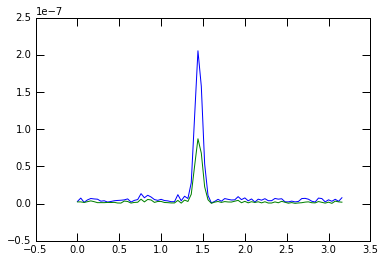

In [300]:
print np.shape(oa), np.shape(el)
for i in range(2):
    pyp.plot(oa, el[i])

7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10
7e-10


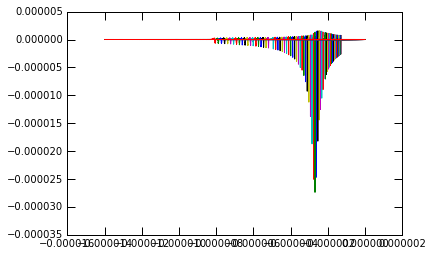

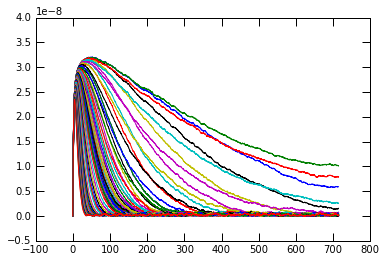

In [304]:
off_angle_array = np.arange(0.0,80*0.04, 0.04)
i_off_angle_array = range(0, len(off_angle_array))
for i_offangle in i_off_angle_array:
    efield_td, efield_fd = read_npz_files(35,89)
    efield = efield_td[i_offangle]['y_v_per_m']
    time = efield_td[i_offangle]['time_s']
    
    pyp.figure(1)
    pyp.plot(time, efield)
    
    time -= time[0]
    dt = np.abs(time[1]-time[0])
    E_fft = np.fft.rfft(efield)*dt*1.e6 # use dt in µs so that fft is in units of V/m/MHz
    fr = np.fft.rfftfreq(len(efield), dt*1.e6) # frequencies in MHz
    
    pyp.figure(2)
    pyp.plot(fr, np.abs(E_fft))

In [319]:
h = 2
zenith_list = np.array([55, 60, 65, 70, 75, 80, 85, 87, 89])
f_Lo_list = np.arange(10., 1610., 10.)
bandwidth = 10.

###
# Construct an array of the peak efield for a range of starting frequencies
# and bandwidths and psi angles
## Shape of the array is 
##  [zenith angle [55,65,60,70,75,80,85,87,89 starting_frequency (10-1600 MHz in 10 MHz steps), bandwidth (10 MHz), off_angles (0.04-3.2 in 0.04 deg steps)]

epeak_array = []
for z in zenith_list:
    psi_list, epeak_list = efield_vs_angle(h, z, f_Lo_list, bandwidth)
    epeak_array.append(epeak_list)
    
epeak_array = np.array(epeak_array)


###################################

 Let's see what we're up against
 
 By looking at heat maps of slices of the data
 
##################################

Dimensions of the data set include:

    + zenith angle (sparse, [55, 60.70.75,80,85,87, 89])
    + starting frequency (f_Lo) [10-1610 MHz in 10 Mhz steps] -- storing 
    + bandwidth (bandwidth) [just 10 MHz, so single element array]
    + psi angle / view angle (0.04 to 3.2° in 0.04 steps)


In [10]:
def epeak_zenith_angle_slice(i_ze, epeak_array):
    return epeak_array[i_ze,:, :] 
def epeak_start_freq_slice(i_f_Lo, epeak_array):
    return epeak_array[:,i_f_Lo,:] 
def epeak_psi_angle_slice(i_psi, epeak_array):
    return epeak_array[:,:,i_psi] 

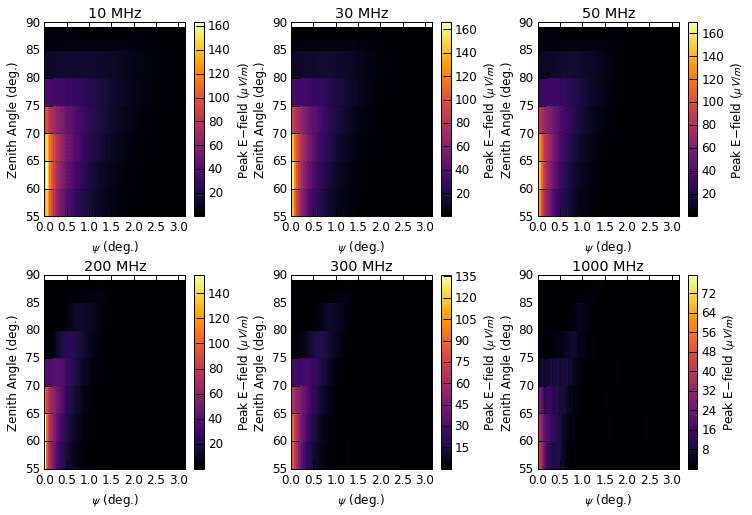

In [11]:
### Plot epeak vs zenith angle vs psi angle for fixed starting frequ(ency
choose_start_freq = [10., 30., 50., 200., 300., 1000.]
#ind = [np.where(f_Lo_list == choose_start_freq[i])[0][0] for i in range(len(choose_start_freq))]
ind = [1, 3, 5, 8, 20, 30]
titles = ["%d MHz"%(freq) for freq in choose_start_freq]
fig = pyp.figure(1, figsize=(12,8))
pyp.subplots_adjust(hspace=0.3, wspace=0.4)

choose_start_freq = [10., 30., 50., 200., 300., 1000.]
titles = ["%d MHz"%(freq) for freq in choose_start_freq]
fig = pyp.figure(1, figsize=(12,8))
pyp.subplots_adjust(hspace=0.3, wspace=0.4)

for i,freq in enumerate(choose_start_freq):
    i_f_Lo = int(freq/10)
    ax = pyp.subplot(2,3,i+1)
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    p, zenith = np.meshgrid( psi_list, zenith_list)
    #H=epeak_array[:, ind[i_f_Lo], 0, :]*1e6
    H = epeak_start_freq_slice(i_f_Lo, epeak_array)*1e6
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
    pyp.pcolormesh(p, zenith, Hmasked, cmap='inferno', )
    pyp.ylim(zenith_list.min(), zenith_list.max()+1)
    pyp.xlim(psi_list.min(), psi_list.max())
    pyp.colorbar(label="Peak E-field ($\mu V/m$)")
    pyp.ylabel('Zenith Angle (deg.)')
    pyp.xlabel('$\psi$ (deg.)')
    pyp.grid(True, which='both')
    pyp.title(titles[i])
pyp.savefig(os.environ['TAU_ACC_DETECTOR_PLOTS_DIR'] + "/efield_maps_altitude%dkm_ze_vs_psi.png"%(h) )

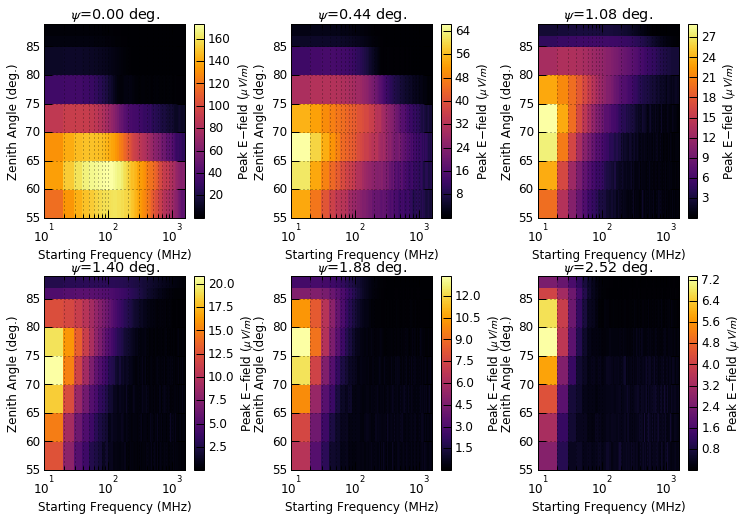

In [12]:
### Second plot will be epeak vs zenith angle vs starting frequency for fixed psi angle
ind = [0, 11, 27, 35, 47, 63]
choose_psi = psi_list[ind]
titles = ["$\psi$=%2.2f deg."%(p) for p in choose_psi]
fig = pyp.figure(1, figsize=(12,8))
pyp.subplots_adjust(hspace=0.3, wspace=0.4)

for i, p in enumerate(choose_psi):
    i_psi = ind[i]
    ax = pyp.subplot(2,3,i+1)
    ax.set_xscale('log')
    #ax.set_yscale('log')
    start_freq, zenith = np.meshgrid(  f_Lo_list, zenith_list)
    #H=epeak_array[:, :, 0, i_psi]*1e6
    H = epeak_psi_angle_slice(i_psi, epeak_array)*1e6
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
    pyp.pcolormesh(start_freq, zenith, Hmasked, cmap='inferno', )
    pyp.ylim(zenith_list.min(), zenith_list.max())
    pyp.xlim(f_Lo_list.min(), f_Lo_list.max())
    pyp.colorbar(label="Peak E-field ($\mu V/m$)")
    pyp.ylabel('Zenith Angle (deg.)')
    pyp.xlabel('Starting Frequency (MHz)')
    pyp.grid(True, which='both')
    pyp.title(titles[i])
pyp.savefig(os.environ['TAU_ACC_DETECTOR_PLOTS_DIR'] + "/efield_maps_altitude%dkm_startfreq_vs_ze.png"%(h) )

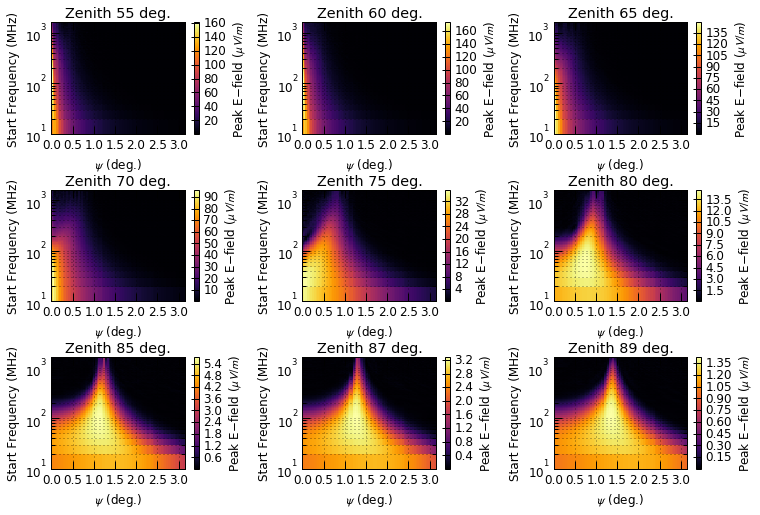

In [13]:
### Third plot will be epeak vs starting frequency vs psi_list for fixed psi angles
ind = [0,1,2,3,4,5,6,7,8]
choose_zenith = zenith_list[ind]
titles = ["Zenith %d deg."%(int(z)) for z in choose_zenith]
fig = pyp.figure(1, figsize=(12,8))
pyp.subplots_adjust(hspace=0.5, wspace=0.5)

for i_ze, ze in enumerate(choose_zenith):
    ax = pyp.subplot(3,3,i_ze+1)
    #ax.set_xscale('log')
    ax.set_yscale('log')
    p, start_freq = np.meshgrid(psi_list, f_Lo_list)
    #H=epeak_array[i_ze, :, 0, :]*1e6
    H = epeak_zenith_angle_slice(i_ze, epeak_array)*1e6
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
    pyp.pcolormesh( p,start_freq, Hmasked, cmap='inferno', )
    pyp.xlim(psi_list.min(), psi_list.max())
    pyp.ylim(f_Lo_list.min(), f_Lo_list.max())
    pyp.colorbar(label="Peak E-field ($\mu V/m$)")
    pyp.xlabel('$\psi$ (deg.)')
    pyp.ylabel('Start Frequency (MHz)')
    pyp.grid(True, which='both')
    pyp.title(titles[i_ze])
pyp.savefig(os.environ['TAU_ACC_DETECTOR_PLOTS_DIR'] + "/efield_maps_altitude%dkm_startfreq_psi.png"%(h) )

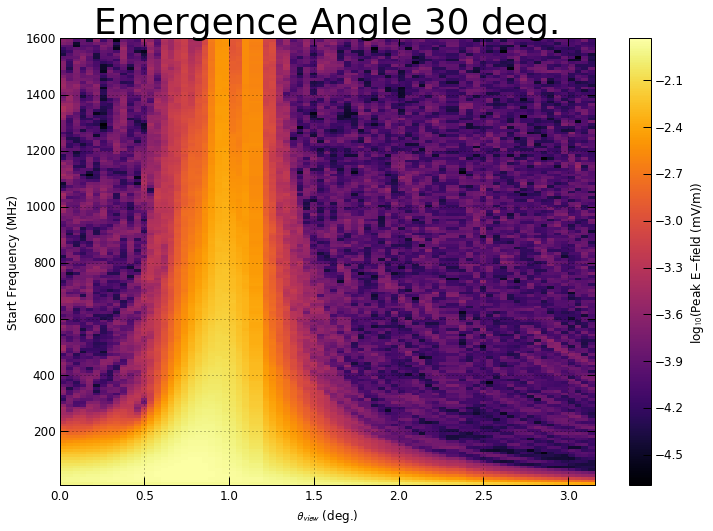

In [14]:
### Single plot 
ind = [0,1,2,3,4,5]
choose_zenith = zenith_list[ind]
titles = ["Emergence Angle %d deg."%(90.-int(z)) for z in [60]]
fig = pyp.figure(1, figsize=(12,8))
pyp.subplots_adjust(hspace=0.3, wspace=0.5)

for i_ze, ze in enumerate([60]):
    #ax = pyp.subplot(2,3,i_ze+1)
    #ax.set_xscale('log')
    ax.set_yscale('log')
    p, start_freq = np.meshgrid(psi_list, f_Lo_list)
    #H=epeak_array[i_ze, :, 0, :]*1e6
    H = epeak_zenith_angle_slice(5, epeak_array)*1e3
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
    pyp.pcolormesh( p,start_freq, np.log10(Hmasked), cmap='inferno', )
    pyp.xlim(psi_list.min(), psi_list.max())
    pyp.ylim(f_Lo_list.min(), f_Lo_list.max())
    pyp.colorbar(label="log$_{10}$(Peak E-field (mV/m))")
    pyp.xlabel(r'$\theta_{view}$ (deg.)')
    pyp.ylabel('Start Frequency (MHz)')
    pyp.grid(True, which='both')
    pyp.title(titles[i_ze], fontsize=36)
    pyp.savefig(os.environ['TAU_ACC_DETECTOR_PLOTS_DIR'] + "/efield_maps_altitude%dkm_startfreq_psi_zen%d.png"%(h, ze) )

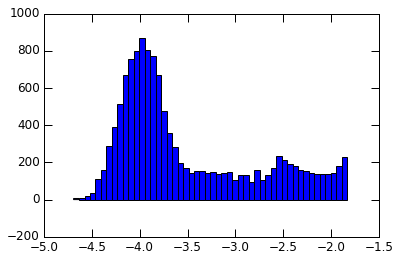

In [15]:
n  = pyp.hist(np.log10(Hmasked.flatten()),50)

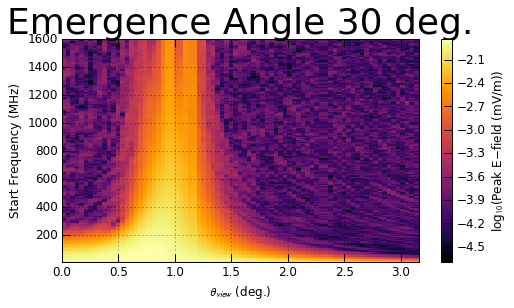

In [16]:
### Single plot 
ind = [0,1,2,3,4,5]
choose_zenith = zenith_list[ind]
titles = ["Emergence Angle %d deg."%(90.-int(z)) for z in [60]]
fig = pyp.figure(1, figsize=(8,4))
pyp.subplots_adjust(hspace=0.3, wspace=0.5)

for i_ze, ze in enumerate([60]):
    #ax = pyp.subplot(2,3,i_ze+1)
    #ax.set_xscale('log')
    ax.set_yscale('log')
    p, start_freq = np.meshgrid(psi_list, f_Lo_list)
    #H=epeak_array[i_ze, :, 0, :]*1e6
    H = epeak_zenith_angle_slice(5, epeak_array)*1e3
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
    pyp.pcolormesh( p,start_freq, np.log10(Hmasked), cmap='inferno', )
    pyp.xlim(psi_list.min(), psi_list.max())
    pyp.ylim(f_Lo_list.min(), f_Lo_list.max())
    pyp.colorbar(label="log$_{10}$(Peak E-field (mV/m))")
    pyp.xlabel(r'$\theta_{view}$ (deg.)')
    pyp.ylabel('Start Frequency (MHz)')
    pyp.grid(True, which='both')
    pyp.title(titles[i_ze], fontsize=36)
    pyp.savefig(os.environ['TAU_ACC_DETECTOR_PLOTS_DIR'] + "/efield_maps_altitude%dkm_startfreq_psi_zen%d.png"%(h, ze) )

(array([11]), array([0])) [ 0.] [ 120.] 2
[-3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.  ]


NameError: name 'leng' is not defined

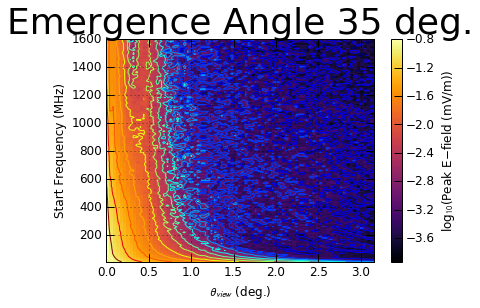

In [17]:
### Fit contours
ind = [0,1,2,3,4,5]
choose_zenith = zenith_list[ind]
titles = ["Emergence Angle %d deg."%(90.-int(z)) for z in [55]]
fig = pyp.figure(1)
pyp.subplots_adjust(hspace=0.3, wspace=0.5)

for i_ze, ze in enumerate([55]):
    #ax = pyp.subplot(2,3,i_ze+1)
    #ax.set_xscale('log')
    ax.set_yscale('log')
    
    # set up the 2-d histogram
    p, start_freq = np.meshgrid(psi_list, f_Lo_list)
    H = epeak_zenith_angle_slice(0, epeak_array)*1e3
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
    
    # plot the 2-d histogram
    pyp.pcolormesh( p,start_freq, np.log10(Hmasked), cmap='inferno', )
    pyp.xlim(psi_list.min(), psi_list.max())
    pyp.ylim(f_Lo_list.min(), f_Lo_list.max())
    pyp.colorbar(label="log$_{10}$(Peak E-field (mV/m))")
    pyp.xlabel(r'$\theta_{view}$ (deg.)')
    pyp.ylabel('Start Frequency (MHz)')
    pyp.grid(True, which='both')
    pyp.title(titles[i_ze], fontsize=36)
    
    # find the peak position
    max_ind = np.where(Hmasked == np.max(Hmasked))
    print max_ind, psi_list[max_ind[1]], f_Lo_list[max_ind[0]], 
    peak_pos_transition =-1
    peak_psi_position = psi_list[max_ind[1]]
    num_segs = 1
    if( psi_list[max_ind[1]]  > peak_pos_transition):
        num_segs = 2
    print num_segs
    
    # draw contours
    #V = [-4.0, -3.8, -3.6, -3.2, -3.0, -2.8]
    #V = np.linspace(0.01*np.max(np.log10(Hmasked)), np.max(np.log10(Hmasked)), 10)
    #print "V", np.max(np.log10(Hmasked)), V
    CS = pyp.contour(p,start_freq, np.log10(Hmasked), 15)
    print CS.cvalues
    
    lengths = []
    #highest_start_freq = 0.
    highest_end_freq = 0.
    max_length = 0.
    contour_ind=0
    
    #if(peak_psi_position > peak_pos_transition):
        # allow 2 or 3 segments
    for i in range(len(CS.allsegs)):
        if( len(CS.allsegs[i]) < 3):
            for seg in range(len(CS.allsegs[i])):
                leng += len(CS.allsegs[i][seg])
                
            print CS.allsegs[1][0][-1][1],highest_end_freq  
            if( CS.allsegs[i][0][0][1] > highest_end_freq):
                highest_end_freq = CS.allsegs[i][0][0][1]
                contour_ind = i
                print contour_ind, highest_end_freq, leng
        else:
            lengths.append(0)
    #else: # peak is closer to zero. Allow only one segment
    #    for i in range(len(CS.allsegs)):
    #        if( len(CS.allsegs[i]) == 1):
    #            if(leng > max_length):
    #                max_length=leng
    #                contour_ind=i
    #                lengths.append(leng)
    #        else:
    #            lengths.append(0)
    num_segs = len(CS.allsegs[contour_ind]) 
    lengths = np.array(lengths)

    # subtract numerical noise
    # find the boundary and set up an interpolator
    # note that we're taking the first (-4.0) of the countours on the right
    # the first index on CS.allsegs is the contour level starting from the lowest contour
    # the second index selects the segment of the contour 0 - right, 1 - left
    boundary_right = CS.allsegs[contour_ind][0]
    fbound_right = scipy.interpolate.interp1d(boundary_right[:,0], boundary_right[:,1])
    xes = np.arange(min(boundary_right[:,0]), max(boundary_right[:,0]), 0.01)
    pyp.plot(xes, fbound_right(xes), "w", linewidth=4, linestyle="--") 
    
    if( num_segs == 2):
        # get the left boundary
        boundary_left = CS.allsegs[contour_ind][1]
        fbound_left = scipy.interpolate.interp1d(boundary_left[:,0], boundary_left[:,1])
        xes = np.arange(min(boundary_left[:,0]), max(boundary_left[:,0]), 0.01)
        pyp.plot(xes, fbound_left(xes), "w", linewidth=4, linestyle="--") 

        # find peak position
        indpeak = np.array(np.where(np.log10(Hmasked) == np.max(np.log10(Hmasked)) ))
        epeak_max_psi = psi_list[indpeak[1,0]]
        epeak_max_flo = f_Lo_list[indpeak[0,0]]
        print epeak_max_psi, epeak_max_flo, np.log10(Hmasked[indpeak[0,0],indpeak[1,0]])

    for ind1, pval in enumerate(psi_list):
        for ind2, floval in enumerate(f_Lo_list):
            #print ind1, pval, ind2, floval
            try:
                if( floval > fbound_right(pval) ):
                    Hmasked[ind2, ind1] = 0. 
            except ValueError:
                if(num_segs == 1):
                    if(pval > max(boundary_right[:,0])):
                        Hmasked[ind2, ind1] = 0.
                else:
                    try: 
                        if( floval > fbound_left(pval) ):
                            Hmasked[ind2, ind1] = 0.
                    except ValueError:
                        #print pval, "outside of range"
                        continue

    # plot the 2-d histogram
    pyp.figure(2)
    pyp.pcolormesh( p,start_freq, np.log10(Hmasked), cmap='inferno', )
    pyp.xlim(psi_list.min(), psi_list.max())
    pyp.ylim(f_Lo_list.min(), f_Lo_list.max())
    pyp.colorbar(label="log$_{10}$(Peak E-field (mV/m))")
    pyp.xlabel(r'$\theta_{view}$ (deg.)')
    pyp.ylabel('Start Frequency (MHz)')
    pyp.grid(True, which='both')
    pyp.title(titles[i_ze], fontsize=36)
    

    # draw contours
    V = [-4.0, -3.8, -3.6, -3.2, -3.0, -2.8]
    CS = pyp.contour(p,start_freq, np.log10(Hmasked), V)
    
    xes = np.arange(min(boundary_right[:,0]), max(boundary_right[:,0]), 0.01)
    pyp.plot(xes, fbound_right(xes), "k", linewidth=4, linestyle="--") 

    if(peak_psi_position > peak_pos_transition):
        xes = np.arange(min(boundary_left[:,0]), max(boundary_left[:,0]), 0.01)
        pyp.plot(xes, fbound_left(xes), "k", linewidth=4, linestyle="--")

    
    #pyp.savefig(os.environ['TAU_ACC_DETECTOR_PLOTS_DIR'] + "/efield_maps_altitude%dkm_startfreq_psi_zen%d.png"%(h, ze) )

/Users/wissels/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/wissels/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


[-7.  -6.8 -6.6 -6.2 -6.  -5.8]


IndexError: list index out of range

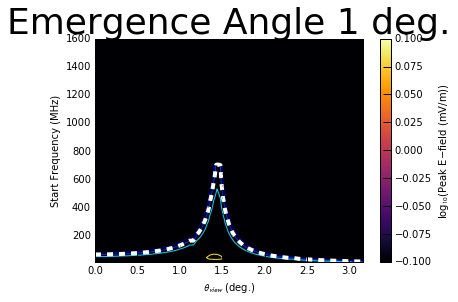

In [289]:
### Fit contours
i_ze = 8
ze = zenith_list[i_ze]
titles = ["Emergence Angle %d deg."%(90.-int(ze)) for ze in zenith_list]
fig = pyp.figure(1)
pyp.subplots_adjust(hspace=0.3, wspace=0.5)

#ax = pyp.subplot(2,3,i_ze+1)
#ax.set_xscale('log')
ax.set_yscale('log')

# set up the 2-d histogram
p, start_freq = np.meshgrid(psi_list, f_Lo_list)
#epeak_array[i_ze,:, :] 
#H = epeak_zenith_angle_slice(1, epeak_array)*1e3
#Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

# plot the 2-d histogram
pyp.pcolormesh( p,start_freq, np.log10(epeak_array[i_ze,:, :] ), cmap='inferno', )
pyp.xlim(psi_list.min(), psi_list.max())
pyp.ylim(f_Lo_list.min(), f_Lo_list.max())
pyp.colorbar(label="log$_{10}$(Peak E-field (mV/m))")
pyp.xlabel(r'$\theta_{view}$ (deg.)')
pyp.ylabel('Start Frequency (MHz)')
pyp.grid(True, which='both')
pyp.title(titles[i_ze], fontsize=36)

# draw contours
V = [-7.0, -6.8, -6.6, -6.2, -6.0, -5.8]
CS = pyp.contour(p,start_freq, np.log10(epeak_array[i_ze,:, :] ), V)
print CS.cvalues
#print CS.allsegs
# subtract numerical noise
# find the boundary and set up an interpolator
# note that we're taking the first (-4.0) of the countours on the right
# the first index on CS.allsegs is the contour level starting from the lowest contour
# the second index selects the segment of the contour 0 - right, 1 - left
boundary_right = CS.allsegs[1][0]
fbound_right = scipy.interpolate.interp1d(boundary_right[:,0], boundary_right[:,1])
xes = np.arange(min(boundary_right[:,0]), max(boundary_right[:,0]), 0.01)
pyp.plot(xes, fbound_right(xes), "w", linewidth=4, linestyle="--") 

# get the left boundary
boundary_left = CS.allsegs[1][1]
fbound_left = scipy.interpolate.interp1d(boundary_left[:,0], boundary_left[:,1])
xes = np.arange(min(boundary_left[:,0]), max(boundary_left[:,0]), 0.01)
pyp.plot(xes, fbound_left(xes), "w", linewidth=4, linestyle="--") 

for ind1, pval in enumerate(psi_list):
    for ind2, floval in enumerate(f_Lo_list):
        #print ind1, pval, ind2, floval
        try:
            if( floval > fbound_left(pval) ):
                epeak_array[i_ze,:, :][ind2, ind1] = 0. 
        except ValueError:
            try: 
                if( floval > fbound_right(pval) ):
                    epeak_array[i_ze,:, :][ind2, ind1] = 0.
            except ValueError:
                #print pval, "outside of range"
                continue

H = epeak_array[i_ze,:, :]
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

# plot the 2-d histogram
pyp.figure(2)
pyp.pcolormesh( p,start_freq, np.log10(Hmasked), cmap='inferno', )
pyp.xlim(psi_list.min(), psi_list.max())
pyp.ylim(f_Lo_list.min(), f_Lo_list.max())
pyp.colorbar(label="log$_{10}$(Peak E-field (mV/m))")
pyp.xlabel(r'$\theta_{view}$ (deg.)')
pyp.ylabel('Start Frequency (MHz)')
pyp.grid(True, which='both')
pyp.title(titles[i_ze], fontsize=36)


# draw contours
CS = pyp.contour(p,start_freq, np.log10(epeak_array[i_ze,:, :]), V)

xes = np.arange(min(boundary_right[:,0]), max(boundary_right[:,0]), 0.01)
pyp.plot(xes, fbound_right(xes), "k", linewidth=4, linestyle="--") 

xes = np.arange(min(boundary_left[:,0]), max(boundary_left[:,0]), 0.01)
pyp.plot(xes, fbound_left(xes), "k", linewidth=4, linestyle="--")


#pyp.savefig(os.environ['TAU_ACC_DETECTOR_PLOTS_DIR'] + "/efield_maps_altitude%dkm_startfreq_psi_zen%d.png"%(h, ze) )

In [358]:
gauss_blur_sigma = 2.5
ncontours = 10
i_ze=0

num_contour_segs [2 1 1 1 1 1 1 1 1]
len_contour_segs [ 315.  265.  208.  196.  187.  179.  173.  128.   40.]
upper right 6.74953393703 0.114194234244
upper left 5.61418808409 0.542181497892
5.61418808409  <? 6.17856276581
max_num_contour_segments 1
315.0 187.888888889


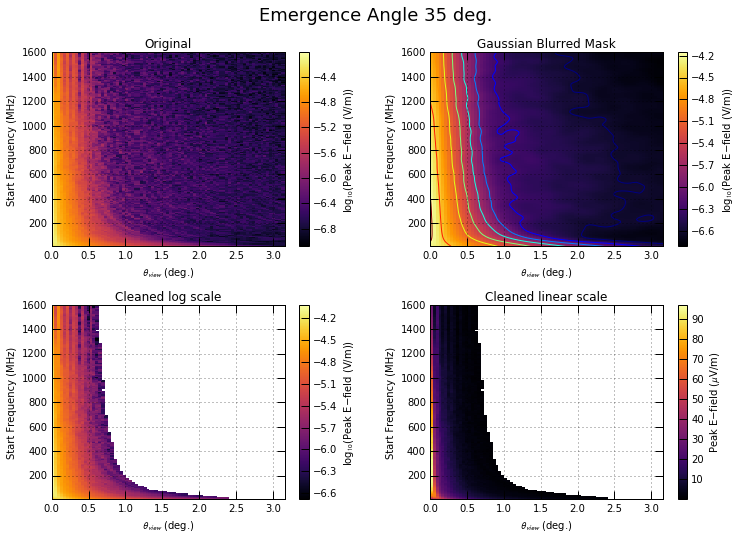

In [359]:
### Use gaussian blur to set mask
ze = zenith_list[i_ze]
titles = ["Emergence Angle %d deg."%(90.-int(ze)) for ze in zenith_list]
fig = pyp.figure(1, figsize=(12,8))
pyp.subplots_adjust(hspace=0.3, wspace=0.3)
pyp.suptitle(titles[i_ze], fontsize=18)

# set up the 2-d histogram
p, start_freq = np.meshgrid(psi_list, f_Lo_list)
#epeak_array[i_ze,:, :] 
H = epeak_zenith_angle_slice(i_ze, epeak_array)
#Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
Hmasked = H

# plot the 2-d histogram
pyp.subplot(2, 2, 1)
pyp.pcolormesh( p,start_freq, np.log10(Hmasked), cmap='inferno', )
pyp.xlim(psi_list.min(), psi_list.max())
pyp.ylim(f_Lo_list.min(), f_Lo_list.max())
pyp.colorbar(label="log$_{10}$(Peak E-field (V/m))")
pyp.xlabel(r'$\theta_{view}$ (deg.)')
pyp.ylabel('Start Frequency (MHz)')
pyp.grid(True, which='both')
pyp.title("Original")

# construct a Gaussian blur
pyp.subplot(2, 2, 2)
Hgauss_blur = gaussian(Hmasked, sigma=gauss_blur_sigma)
pyp.pcolormesh( p,start_freq, np.log10(Hgauss_blur), cmap='inferno', )
pyp.xlim(psi_list.min(), psi_list.max())
pyp.ylim(f_Lo_list.min(), f_Lo_list.max())
pyp.colorbar(label="log$_{10}$(Peak E-field (V/m))")
pyp.xlabel(r'$\theta_{view}$ (deg.)')
pyp.ylabel('Start Frequency (MHz)')
pyp.grid(True, which='both')
pyp.title("Gaussian Blurred Mask")

# find the contours:
CS = pyp.contour(p,start_freq, np.log10(Hgauss_blur),ncontours)

# Decide which contour to keep
num_contour_segs = np.array([len(CS.allsegs[i]) for i in range(len(CS.allsegs))])
len_contour_segs = np.zeros(len(num_contour_segs))
for i in range(len(CS.allsegs)):
    for j in range(len(CS.allsegs[i])):
        len_contour_segs[i] += len(CS.allsegs[i][j])
print "num_contour_segs", num_contour_segs
print "len_contour_segs", len_contour_segs

# if the mean is within 2*rms on both sides then keep up to 2 segments
# if not keep only one segment
max_num_contour_segments = 2
upper_right = np.log10(Hmasked[-20:-1, -20:-1] )
upper_left = np.log10(Hmasked[-20:-1, 0:20])
print "upper right", np.abs(np.mean(upper_right)), np.std(upper_right)
print "upper left", np.abs(np.mean(upper_left)), np.std(upper_left)
print np.abs(np.mean(upper_left)), " <?", np.abs(np.mean(upper_right)) - 5*np.std(upper_right)

# if the upper left quadrant is higher than the upper right quadrant
if np.abs(np.mean(upper_left)) + 2.*np.std(upper_left)< np.abs(np.mean(upper_right)) :
    max_num_contour_segments = 1
print "max_num_contour_segments", max_num_contour_segments

# reject contours that are 50% lower than or 200% higher than the mean 
# to get rid of small islands and really jagged contours
i=0
c=0
while( (len_contour_segs[c] < 0.5*np.mean(len_contour_segs) or
        len_contour_segs[c] > 2.*np.mean(len_contour_segs)) or
        num_contour_segs[i] > max_num_contour_segments):
    #print "in while", c, np.where(num_contour_segs <= max_num_contour_segments)[0][c],
    print len_contour_segs[c], np.mean(len_contour_segs)
    i = np.where(num_contour_segs <= max_num_contour_segments)[0][c]
    c+=1
i = np.where(num_contour_segs <= max_num_contour_segments)[0][c]
level = CS.levels[i]

# plot the cleaned 2-d histogram
pyp.subplot(2, 2, 3)

# Mask pixels less than the average of the noise
Hmasked2 = np.ma.masked_where(np.log10(Hgauss_blur)<level,Hmasked) 
pyp.pcolormesh( p,start_freq, np.log10(Hmasked2), cmap='inferno', )
pyp.xlim(psi_list.min(), psi_list.max())
pyp.ylim(f_Lo_list.min(), f_Lo_list.max())
pyp.colorbar(label="log$_{10}$(Peak E-field (V/m))")
pyp.xlabel(r'$\theta_{view}$ (deg.)')
pyp.ylabel('Start Frequency (MHz)')
pyp.grid(True, which='both')
pyp.title("Cleaned log scale")

# Mask pixels less than the average of the noise
pyp.subplot(2, 2, 4)
pyp.pcolormesh( p,start_freq, Hmasked2*1e6, cmap='inferno', )
pyp.xlim(psi_list.min(), psi_list.max())
pyp.ylim(f_Lo_list.min(), f_Lo_list.max())
pyp.colorbar(label="Peak E-field ($\mu$V/m)")
pyp.xlabel(r'$\theta_{view}$ (deg.)')
pyp.ylabel('Start Frequency (MHz)')
pyp.grid(True, which='both')
pyp.title("Cleaned linear scale")

In [ ]:
#############
# Now look at 2d slices

In [ ]:
#### This is a test of the linear interpolator in two dimensions.
### You can adjust the frequency by changing i_f_Lo, the index
### to f_Lo_list. i_f_Lo x 10 = the frequency to interpolate the 
### curvesin MHz
i_f_Lo = 100
zz,  pp = np.meshgrid(zenith_list, psi_list)
interpolator = scipy.interpolate.LinearNDInterpolator(
    np.vstack((zz.flatten(), pp.flatten())).T, 
              epeak_array[:,i_f_Lo,:].T.flatten()
             )  
print interpolator(75, 0.5)
print np.vstack((zz.flatten(), pp.flatten())).T[0] 

In [ ]:
#### In this figure, the thick solid lines are the values from the simulatiosn
#### the dashed lines are from the interpolator.
epeak_zen = epeak_start_freq_slice(i_f_Lo, epeak_array)*1e6
norm = matplotlib.colors.Normalize(vmin=50, vmax=87)
for i_ze, ze in enumerate(zenith_list):
    pyp.plot(psi_list, np.log10(epeak_zen[ i_ze, :]), color = cmap(norm(ze)), linewidth=3,
             label="%d$^{\circ}$"%(int(ze)))
    
for ze in np.arange(63, 90, 5):
    pyp.plot(psi_list, np.log10(interpolator( ze, psi_list,)*1e6), 
             color=cmap(norm(ze)), linestyle='--', label="%d$^{\circ}$"%(int(ze)))
pyp.xlabel(" $\psi$ (deg.)")
pyp.ylabel("log(Peak E-field ($\mu V/m$))")
pyp.xlim(psi_list.min(), psi_list.max())
#pyp.ylim(0,)
pyp.legend(loc=[1.01, 0.1])
pyp.title("%d MHz"%((int(f_Lo_list[i_f_Lo]))))

In [ ]:
#### This is a test of the linear interpolator in two dimensions.
### You can adjust the zenith angle by changing i_ze, the index
### to zenith_list. There are 6 non-uniform zenith angle bins 
### [60,70,75,80,85,87] deg. 

i_ze = 4
ff,  pp = np.meshgrid(f_Lo_list, psi_list)
interpolator = scipy.interpolate.LinearNDInterpolator(
    np.vstack((ff.flatten(), pp.flatten())).T, 
              epeak_array[i_ze,:,:].T.flatten()
             )  
print interpolator(600, 0.5)

In [ ]:
#### In this figure, the thick solid lines are the values from the simulatiosn
#### the dashed lines are from the interpolator.

epeak_freq = epeak_zenith_angle_slice(i_ze, epeak_array)*1e6
norm = matplotlib.colors.Normalize(vmin=10, vmax=1600)
nstep=10
for i_f_Lo, f_Lo in enumerate(f_Lo_list[0::nstep]):
    pyp.plot(psi_list, epeak_freq[ i_f_Lo*nstep, :], color = cmap(norm(f_Lo)), linewidth=3,
            label="%d MHz"%(int(f_Lo)))

for f_Lo in np.array([15, 35, 75, 95, 263, 340, 675, 1025]):
    pyp.plot(psi_list, interpolator( f_Lo, psi_list,)*1e6, 
             color=cmap(norm(f_Lo)), linestyle='--', label="%d MHz"%(int(f_Lo)))

pyp.xlim(psi_list.min(), psi_list.max())
pyp.ylim(0,)
pyp.legend(loc=[1.01, 0])
pyp.xlabel(" $\psi$ (deg.)")
pyp.ylabel("Peak E-field ($\mu V/m$)")
pyp.title("Zenith %d$^{\circ}$"%(int(zenith_list[i_ze])))

In [ ]:
#### This is a test of the linear interpolator in two dimensions.
### You can adjust the psi angle by changing i_psi, the index
### to psi_list. There are 80 points in 0.04 deg spacing 
### from 0.01 to 3.2 deg. 

i_psi = 28
zz, ff = np.meshgrid(zenith_list, f_Lo_list)
interpolator = scipy.interpolate.LinearNDInterpolator(
    np.vstack((zz.flatten(), ff.flatten())).T, 
              epeak_array[:,:,i_psi].T.flatten()
             )  
print interpolator(63, 525)

In [ ]:
#### In this figure, the thick solid lines are the values from the simulatiosn
#### the dashed lines are from the interpolator.
pyp.figure(1)
epeak_psi = epeak_psi_angle_slice(i_psi, epeak_array)*1e6
norm = matplotlib.colors.Normalize(vmin=10, vmax=1600)
nstep=10
for i_f_Lo, f_Lo in enumerate(f_Lo_list[0::nstep]):
    pyp.plot(zenith_list, epeak_psi[ :, i_f_Lo*nstep], color = cmap(norm(f_Lo)), linewidth=3,
            label="%d MHz"%(int(f_Lo)))

for f_Lo in np.array([15, 35, 75, 95, 263, 340, 675, 1025]):
    pyp.plot(zenith_list, interpolator(zenith_list, f_Lo)*1e6, 
             color=cmap(norm(f_Lo)), linestyle='--', label="%d MHz"%(int(f_Lo)))    

pyp.xlim(zenith_list.min(), zenith_list.max())
pyp.ylim(0,)
pyp.xlabel("Zenith Angle (deg.)")
pyp.ylabel("Peak E-field ($\mu V/m$)")
pyp.legend(loc=[1.01, 0.])
pyp.title("$\psi$ %2.2f$^{\circ}$"%(int(psi_list[i_psi])))

pyp.figure(2)
epeak_zen = epeak_array[:,:,i_psi]*1e6
norm = matplotlib.colors.Normalize(vmin=50, vmax=90)
for i_ze, ze in enumerate(zenith_list):
    pyp.semilogx(f_Lo_list, epeak_zen[ i_ze, :], color = cmap(norm(ze)), linewidth=3,
             label="%d$^{\circ}$"%(int(ze)))
    
for ze in np.arange(63, 90, 5):
    pyp.semilogx(f_Lo_list, interpolator( ze, f_Lo_list)*1e6, 
             color=cmap(norm(ze)), linestyle='--', label="%d$^{\circ}$"%(int(ze)))
    
pyp.xlim(f_Lo_list.min(), f_Lo_list.max())
pyp.ylim(0,)
pyp.xlabel("Frequency (MHz)")
pyp.ylabel("Peak E-field ($\mu V/m$)")
pyp.legend(loc=[1.01, 0.])
pyp.title("$\psi$ %2.2f$^{\circ}$"%(int(psi_list[i_psi])))

In [ ]:
#############
# Write all of the frequency steps to a file
interp_file = open(os.environ['TAU_ACC_ZHAIRES_DIR']\
                       +'/interpolator_efields_%dkm.npz'%h, 'w')

interpolator_list = []
for i_f_Lo, f_Lo in enumerate(f_Lo_list):
    zz,  pp = np.meshgrid(zenith_list, psi_list)
    interpolator = scipy.interpolate.LinearNDInterpolator(
        np.vstack((zz.flatten(), pp.flatten())).T, 
                  epeak_array[:,i_f_Lo,:].T.flatten()
                     )
    interpolator_list.append(interpolator)
np.savez(interp_file, efield_interpolator_list=interpolator_list)
interp_file.close()

In [ ]:
interpolator = load_interpolator(3)

In [ ]:
%%prun 
for i in range(10000):
    a = 2 + 3

In [ ]:
%%prun 
for i in range(10000):
    a= interpolator[70]( 400, 0.06)

In [ ]:

interp_file = np.load(os.environ['TAU_ACC_ZHAIRES_DIR']\
                       +'/interpolator_efields_%dkm.npz'%h)

In [ ]:
print interp_file.keys(), h
interp = interp_file['efield_interpolator_list']

In [ ]:
%%prun
for i in range(10000):
    a= interp[0](70,0.06)

In [ ]:
%%prun
zen = np.linspace(65.,85.,10000)
psi = np.linspace(0.04,1.2,10000)
a= interp[0](zen,psi)

In [ ]:
interp[0](85., 1.3)